In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [64]:
data = pd.read_csv('./complete.csv')

In [65]:
data.isnull().values.any()

True

In [66]:
drop_features = ["ID", "name", "full_name", "club_logo", "birth_date", "flag", "photo", "preferred_foot", "eur_release_clause", "gk_diving", "gk_handling", "gk_kicking", "gk_positioning", "gk_reflexes", "1_on_1_rush_trait", "argues_with_officials_trait", "backs_into_player_trait",	"diver_trait", "fan's_favourite_trait",	"gk_flat_kick_trait", "gk_long_throw_trait", "gk_up_for_corners_trait", "leadership_trait",	"one_club_player_trait", "puncher_trait", "rushes_out_of_goal_trait", "saves_with_feet_trait", "second_wind_trait", "selfish_trait", "tactician_speciality", "prefers_gk"]

In [67]:
data_1 = data[[item for item in list(data.columns) if item not in drop_features]]

In [68]:
data_1.head()

,club,special,age,league,height_cm,weight_kg,body_type,real_face,nationality,eur_value,...,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
0,Real Madrid CF,2228,32,Spanish Primera División,185.0,80.0,C. Ronaldo,True,Portugal,95500000.0,...,False,False,False,False,False,False,False,False,False,False
1,FC Barcelona,2158,30,Spanish Primera División,170.0,72.0,Messi,True,Argentina,105000000.0,...,False,False,False,False,False,False,False,False,False,False
2,Paris Saint-Germain,2100,25,French Ligue 1,175.0,68.0,Neymar,True,Brazil,123000000.0,...,False,False,False,False,False,False,False,False,False,False
3,FC Barcelona,2291,30,Spanish Primera División,182.0,86.0,Normal,True,Uruguay,97000000.0,...,False,False,False,False,False,False,False,False,False,False
4,FC Bayern Munich,1493,31,German Bundesliga,193.0,92.0,Normal,True,Germany,61000000.0,...,False,False,False,False,False,False,False,False,False,False


In [69]:
for i in list(data_1.columns):
    if data_1[i].isnull().values.any():
        print(i)

club
league
rs
rw
rf
ram
rcm
rm
rdm
rcb
rb
rwb
st
lw
cf
cam
cm
lm
cdm
cb
lb
lwb
ls
lf
lam
lcm
ldm
lcb
gk


In [70]:
data_1[data.club.isnull()].head()

,club,special,age,league,height_cm,weight_kg,body_type,real_face,nationality,eur_value,...,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb
163,NaN,1961,25,NaN,179.0,67.0,Lean,True,Brazil,0.0,...,False,False,False,False,False,False,False,False,False,False
168,NaN,2174,28,NaN,175.0,69.0,Normal,False,Portugal,0.0,...,True,False,False,False,False,False,False,False,False,False
271,NaN,2143,28,NaN,186.0,73.0,Normal,False,Belgium,0.0,...,True,False,False,False,False,False,False,False,False,False
480,NaN,1841,30,NaN,184.0,74.0,Lean,True,Sweden,0.0,...,False,False,False,False,False,False,False,False,False,False
494,NaN,2069,29,NaN,186.0,86.0,Lean,False,Brazil,0.0,...,True,False,False,False,False,False,False,False,False,False


In [71]:
# club and league NaN values are asigned "Unknown"
data_1.club.fillna("Unknown", inplace=True)
data_1.league.fillna("Unknown", inplace=True)

/home/varadadesikan/.local/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [72]:
data_1.club.isnull().values.any()

False

In [73]:
index = data_1[~data_1.gk.isnull()].index

In [74]:
data_2 = data_1.drop(index=index,columns=["gk"])

In [75]:
data_2.shape

(15973, 153)

In [76]:
tf_col = ["acrobatic_clearance_trait", "avoids_using_weaker_foot_trait", "bicycle_kicks_trait", "cautious_with_crosses_trait", "chip_shot_trait", "chipped_penalty_trait", "comes_for_crosses_trait", "corner_specialist_trait", "dives_into_tackles_trait", "diving_header_trait", "driven_pass_trait", "early_crosser_trait", "fancy_flicks_trait", "finesse_shot_trait", "flair_trait", "flair_passes_trait", "giant_throw_in_trait", "inflexible_trait", "injury_free_trait", "injury_prone_trait", "long_passer_trait", "long_shot_taker_trait", "long_throw_in_trait", "outside_foot_shot_trait", "playmaker_trait", "power_free_kick_trait", "power_header_trait", "skilled_dribbling_trait", "stutter_penalty_trait", "swerve_pass_trait", "takes_finesse_free_kicks_trait", "target_forward_trait", "team_player_trait", "technical_dribbler_trait", "tries_to_beat_defensive_line_trait", "poacher_speciality", "speedster_speciality", "aerial_threat_speciality", "dribbler_speciality", "playmaker_speciality", "engine_speciality", "distance_shooter_speciality", "crosser_speciality", "free_kick_specialist_speciality", "tackling_speciality", "acrobat_speciality", "strength_speciality", "clinical_finisher_speciality", "prefers_rs", "prefers_rw", "prefers_rf", "prefers_ram", "prefers_rcm", "prefers_rm", "prefers_rdm", "prefers_rcb", "prefers_rb", "prefers_rwb", "prefers_st", "prefers_lw", "prefers_cf", "prefers_cam", "prefers_cm", "prefers_lm", "prefers_cdm", "prefers_cb", "prefers_lb", "prefers_lwb", "prefers_ls", "prefers_lf", "prefers_lam", "prefers_lcm", "prefers_ldm", "prefers_lcb"]

In [77]:
for i in tf_col:
    data_2[i] = data_2[i].apply(lambda x: 1 if x else 0)

In [78]:
labelEncoder = LabelEncoder()

In [79]:
data_2['club_le'] = labelEncoder.fit_transform(data_2.club)
data_2['league_le'] = labelEncoder.fit_transform(data_2.league)
data_2['body_type_le'] = labelEncoder.fit_transform(data_2.body_type)
data_2['nationality_le'] = labelEncoder.fit_transform(data_2.nationality)
data_2['work_rate_att_le'] = labelEncoder.fit_transform(data_2.work_rate_att)
data_2['work_rate_def_le'] = labelEncoder.fit_transform(data_2.work_rate_def)

In [80]:
data_2['prefers_pos_sum'] = data_2.prefers_rs + data_2.prefers_rw + data_2.prefers_rf + data_2.prefers_ram + data_2.prefers_rcm + data_2.prefers_rm + data_2.prefers_rdm + data_2.prefers_rcb + data_2.prefers_rb + data_2.prefers_rwb + data_2.prefers_st + data_2.prefers_lw + data_2.prefers_cf + data_2.prefers_cam + data_2.prefers_cm + data_2.prefers_lm + data_2.prefers_cdm + data_2.prefers_cb + data_2.prefers_lb + data_2.prefers_lwb + data_2.prefers_ls + data_2.prefers_lf + data_2.prefers_lam + data_2.prefers_lcm + data_2.prefers_ldm + data_2.prefers_lcb

In [81]:
data_2['traits_sum'] = data_2.acrobatic_clearance_trait + data_2.avoids_using_weaker_foot_trait + data_2.bicycle_kicks_trait + data_2.cautious_with_crosses_trait + data_2.chip_shot_trait + data_2.chipped_penalty_trait + data_2.comes_for_crosses_trait + data_2.corner_specialist_trait + data_2.dives_into_tackles_trait + data_2.diving_header_trait + data_2.driven_pass_trait + data_2.early_crosser_trait + data_2.fancy_flicks_trait + data_2.finesse_shot_trait + data_2.flair_trait + data_2.flair_passes_trait + data_2.giant_throw_in_trait + data_2.inflexible_trait + data_2.injury_free_trait + data_2.injury_prone_trait + data_2.long_passer_trait + data_2.long_shot_taker_trait + data_2.long_throw_in_trait + data_2.outside_foot_shot_trait + data_2.playmaker_trait + data_2.power_free_kick_trait + data_2.power_header_trait + data_2.skilled_dribbling_trait + data_2.stutter_penalty_trait + data_2.swerve_pass_trait + data_2.takes_finesse_free_kicks_trait + data_2.target_forward_trait + data_2.team_player_trait + data_2.technical_dribbler_trait + data_2.tries_to_beat_defensive_line_trait + data_2.poacher_speciality + data_2.speedster_speciality + data_2.aerial_threat_speciality + data_2.dribbler_speciality + data_2.playmaker_speciality + data_2.engine_speciality + data_2.distance_shooter_speciality + data_2.crosser_speciality + data_2.free_kick_specialist_speciality + data_2.tackling_speciality + data_2.acrobat_speciality + data_2.strength_speciality + data_2.clinical_finisher_speciality

In [82]:
data_2.head()

,club,special,age,league,height_cm,weight_kg,body_type,real_face,nationality,eur_value,...,prefers_ldm,prefers_lcb,club_le,league_le,body_type_le,nationality_le,work_rate_att_le,work_rate_def_le,prefers_pos_sum,traits_sum
0,Real Madrid CF,2228,32,Spanish Primera División,185.0,80.0,C. Ronaldo,True,Portugal,95500000.0,...,0,0,466,34,1,118,0,1,2,9
1,FC Barcelona,2158,30,Spanish Primera División,170.0,72.0,Messi,True,Argentina,105000000.0,...,0,0,219,34,3,5,2,2,3,9
2,Paris Saint-Germain,2100,25,French Ligue 1,175.0,68.0,Neymar,True,Brazil,123000000.0,...,0,0,432,14,4,18,0,2,1,7
3,FC Barcelona,2291,30,Spanish Primera División,182.0,86.0,Normal,True,Uruguay,97000000.0,...,0,0,219,34,5,154,0,2,1,4
5,FC Bayern Munich,2146,28,German Bundesliga,185.0,79.0,Normal,True,Poland,92000000.0,...,0,0,222,18,5,117,0,2,1,4


In [83]:
corr = data_2.corr()
cor_dict = corr['overall'].sort_values(ascending=False).to_dict()
corr['overall'].sort_values(ascending=False)

overall                        1.000000
reactions                      0.835449
special                        0.794558
composure                      0.773689
cm                             0.762461
rcm                            0.762461
lcm                            0.762461
ball_control                   0.702175
short_passing                  0.698954
potential                      0.670298
rs                             0.663042
ls                             0.663042
st                             0.663042
pas                            0.659460
rm                             0.654209
lm                             0.654209
cam                            0.647561
ram                            0.647561
lam                            0.647561
cf                             0.633769
lf                             0.633769
rf                             0.633769
eur_value                      0.632730
lwb                            0.625556
rwb                            0.625556


In [84]:
cor_list = []
for k in cor_dict:
    if cor_dict[k] > 0.5:
        cor_list.append(k)

In [85]:
cor_list

['overall',
 'reactions',
 'special',
 'composure',
 'cm',
 'rcm',
 'lcm',
 'ball_control',
 'short_passing',
 'potential',
 'rs',
 'ls',
 'st',
 'pas',
 'rm',
 'lm',
 'cam',
 'ram',
 'lam',
 'cf',
 'lf',
 'rf',
 'eur_value',
 'lwb',
 'rwb',
 'rw',
 'lw',
 'cdm',
 'rdm',
 'ldm',
 'eur_wage',
 'long_passing',
 'dri',
 'rb',
 'lb',
 'shot_power',
 'international_reputation',
 'traits_sum',
 'phy',
 'vision']

In [86]:
data_2['bmi'] = data_2.weight_kg / (data_2.height_cm/100.0)**2

In [87]:
data_2.body_type.value_counts()

Normal        9150
Lean          5779
Stocky        1039
C. Ronaldo       1
Neymar           1
Messi            1
Shaqiri          1
Akinfenwa        1
Name: body_type, dtype: int64

In [88]:
data_2.loc[data_2.body_type == 'Neymar', 'body_type'] = 'Lean'
data_2.loc[data_2.body_type == 'Messi', 'body_type'] = 'Lean'
data_2.loc[data_2.body_type == 'Shaqiri', 'body_type'] = 'Normal'
data_2.loc[data_2.body_type == 'Akinfenwa', 'body_type'] = 'Stocky'
data_2.loc[data_2.body_type == 'C. Ronaldo', 'body_type'] = 'Normal'

In [89]:
minmax = MinMaxScaler()

In [90]:
col = ["age", "height_cm", "weight_kg", "real_face", "eur_value", "eur_wage", "potential", "pac", "sho", "pas", "dri", "def", "phy", "international_reputation", "skill_moves"]

In [141]:
arr =  minmax.fit_transform(data_2[col])

/home/varadadesikan/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [142]:
data_norm = pd.DataFrame(arr,columns=col)

In [93]:
features_le = ["club_le", "league_le", "body_type_le", "nationality_le"]

Linear Regression

In [32]:
train, test = train_test_split(data_2, test_size=0.3, random_state=3, shuffle=True)

In [33]:
features = ["club_le", "age", "league_le", "height_cm", "weight_kg", "body_type_le", "real_face", "nationality_le", "eur_value", "eur_wage", "potential", "pac", "sho", "pas", "dri", "def", "phy", "international_reputation", "skill_moves"]

In [34]:
ytrain_ = train['overall']
Xtrain_ = train[features]
ytest_ = test['overall']
Xtest_ = test[features]

In [35]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [36]:
score = -1 * cross_val_score(clf, Xtrain_, ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

4.129338662913173

In [368]:
clf.fit(Xtrain_, ytrain_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [369]:
mean_squared_error(ytest_, clf.predict(Xtest_))

4.286775135158947

In [370]:
clf.score(Xtest_, ytest_)

0.9096882701418771

Multi Regression 

In [371]:
train_, test_ = train_test_split(data_2, test_size=0.3, random_state=3, shuffle=True)

In [372]:
y_features = ["overall", "rs", "rw", "rf", "ram", "rcm", "rm", "rdm", "rcb", "rb", "rwb", "st", "lw", "cf", "cam", "cm", "lm", "cdm", "cb", "lb", "lwb", "ls", "lf", "lam", "lcm", "ldm", "lcb"]

In [373]:
features

['club_le',
 'age',
 'league_le',
 'height_cm',
 'weight_kg',
 'body_type_le',
 'real_face',
 'nationality_le',
 'eur_value',
 'eur_wage',
 'potential',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'international_reputation',
 'skill_moves']

In [374]:
Ytrain_ = train_[y_features]
Xtrain1_ = train_[features]
Ytest_ = test_[y_features]
Xtest1_ = test_[features]

In [375]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
clf =  MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1)

In [376]:
score = -1 * cross_val_score(clf, Xtrain1_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

1.5028106247710387

In [377]:
clf.fit(Xtrain1_, Ytrain_)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
           n_jobs=-1)

In [378]:
mean_squared_error(Ytest_, clf.predict(Xtest1_))

1.5053624463049673

In [379]:
clf.score(Xtest1_, Ytest_)

0.9835424985524895

Decision Tree regressor

In [380]:
from sklearn.tree import DecisionTreeRegressor
clf =  DecisionTreeRegressor()

In [381]:
score = -1 * cross_val_score(clf, Xtrain1_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

5.958799153325582

In [382]:
clf.fit(Xtrain1_, Ytrain_)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [383]:
mean_squared_error(Ytest_, clf.predict(Xtest1_))

5.559497310332035

In [384]:
clf.score(Xtest1_, Ytest_)

0.9424997664353267

Multi Output RandomForest

In [385]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_jobs=-1, n_estimators=500, max_depth=15)

In [386]:
score = -1 * cross_val_score(clf, Xtrain1_, Ytrain_, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
score.mean()

2.2083575825403376

In [387]:
clf.fit(Xtrain1_, Ytrain_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [388]:
mean_squared_error(Ytest_, clf.predict(Xtest1_))

2.0399984907228466

In [389]:
clf.score(Xtest1_, Ytest_)

0.978900900002209

PCA

In [390]:
string_features = ['club', 'league', 'body_type', 'nationality', 'work_rate_att', 'work_rate_def']

In [391]:
train_, test_ = train_test_split(data_2, test_size=0.3, random_state=3, shuffle=True)

In [392]:
Xtrain2_ = train_[[item for item in list(data_2.columns) if item not in ['overall']+string_features]]
Xtest2_ = test_[[item for item in list(data_2.columns) if item not in ['overall']+string_features]]

In [393]:
from sklearn.decomposition import PCA
clf = PCA(n_components=100)

In [394]:
clf.fit(Xtrain2_, Ytrain_)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [395]:
Xtest_pca = clf.transform(Xtest2_)

In [396]:
Xtrain_pca = clf.transform(Xtrain2_)

In [397]:
Xtrain_pca.shape, Xtrain1_.shape

((11181, 100), (11181, 19))

In [398]:
clf =  MultiOutputRegressor(GradientBoostingRegressor(), n_jobs=-1)

In [399]:
clf.fit(Xtrain_pca, Ytrain_)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
           n_jobs=-1)

In [400]:
clf.score(Xtest_pca, Ytest_)

0.9800314527377457

In [124]:
data_norm.head()

,age,height_cm,weight_kg,real_face,eur_value,eur_wage,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves
0,0.516129,0.60,0.508197,1.0,0.776423,1.000000,1.000000,0.920000,1.000000,0.816901,0.916667,0.269231,0.815385,1.0,1.00
1,0.451613,0.30,0.377049,1.0,0.853659,1.000000,0.979167,0.906667,0.962025,0.873239,1.000000,0.179487,0.523077,1.0,0.75
2,0.290323,0.40,0.311475,1.0,1.000000,0.495575,1.000000,0.946667,0.886076,0.774648,0.986111,0.230769,0.507692,1.0,1.00
3,0.451613,0.54,0.606557,1.0,0.788618,0.902655,0.958333,0.813333,0.962025,0.774648,0.875000,0.384615,0.830769,1.0,0.75
4,0.483871,0.76,0.704918,1.0,0.495935,0.407080,0.958333,0.933333,0.962025,1.000000,0.902778,0.615385,0.984615,1.0,0.00


In [99]:
data_2.head()

,club,special,age,league,height_cm,weight_kg,body_type,real_face,nationality,eur_value,...,prefers_lcb,club_le,league_le,body_type_le,nationality_le,work_rate_att_le,work_rate_def_le,prefers_pos_sum,traits_sum,bmi
0,Real Madrid CF,2228,32,Spanish Primera División,185.0,80.0,Normal,True,Portugal,95500000.0,...,0,466,34,1,118,0,1,2,9,23.374726
1,FC Barcelona,2158,30,Spanish Primera División,170.0,72.0,Lean,True,Argentina,105000000.0,...,0,219,34,3,5,2,2,3,9,24.913495
2,Paris Saint-Germain,2100,25,French Ligue 1,175.0,68.0,Lean,True,Brazil,123000000.0,...,0,432,14,4,18,0,2,1,7,22.204082
3,FC Barcelona,2291,30,Spanish Primera División,182.0,86.0,Normal,True,Uruguay,97000000.0,...,0,219,34,5,154,0,2,1,4,25.963048
5,FC Bayern Munich,2146,28,German Bundesliga,185.0,79.0,Normal,True,Poland,92000000.0,...,0,222,18,5,117,0,2,1,4,23.082542


In [143]:
attributes = ["age", "height_cm", "weight_kg", "real_face", "eur_value", "eur_wage", "potential", "pac", 
              "sho", "pas", "dri", "def", "phy", "international_reputation", "skill_moves"]

positions = ['rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw',
             'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 'lwb', 'ls', 'lf', 'lam', 'lcm',
             'ldm', 'lcb']

cols_inc = [x for x in data_norm.columns]

data_norm_att = data_norm.loc[:, attributes].applymap(lambda x: x)
data_norm_att = data_norm_att.loc[data_norm_att.sum(axis=1) > 0, cols_inc]
data_norm_att = data_norm_att.apply(lambda x: (x))

cols_incl = [x for x in y.index if y[x] > 0]

cols_pref = [x for x in data_2.columns if 'prefers' in x]

data_norm_prefs = data_2.loc[:, cols_pref]

y = data_norm_prefs.sum().sort_values(ascending=False)
x = np.arange(1, len(y) + 1)

data_norm_prefs = data_2.loc[:, cols_incl]

data_norm_prefs = data_norm_prefs.drop(columns = ['prefers_pos_sum'])

In [144]:
data_norm_prefs

,prefers_cb,prefers_cm,prefers_st,prefers_cdm,prefers_lm,prefers_rm,prefers_cam,prefers_lb,prefers_rb,prefers_rw,prefers_lw,prefers_cf,prefers_lwb,prefers_rwb
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,1,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,1,1,0,0,0,0,0,0,0


/home/varadadesikan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/varadadesikan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/varadadesikan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/varadadesikan/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/varadadesikan/.local/l

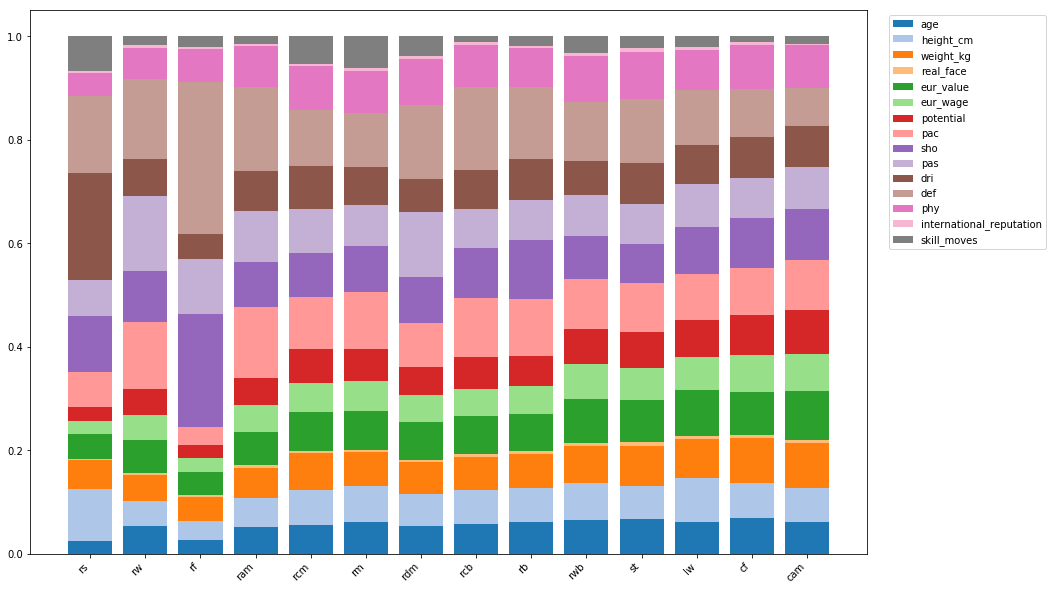

In [145]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
mclf = OneVsRestClassifier(clf)

mclf.fit(data_norm_att, data_norm_prefs)

feat_imp = pd.DataFrame()
feat_imp_sum = np.zeros(len(data_norm_prefs.columns))

fig, ax = plt.subplots(1,1, figsize=(15, 10))

x = 1
for l, e in zip(data_norm_prefs.columns, mclf.estimators_):
    feat_imp.loc[:, l] = e.feature_importances_

colors = np.concatenate((plt.cm.tab20(np.linspace(0, 1, 20)), plt.cm.Set3(np.linspace(0, 1, 10))))
x = np.arange(1, len(feat_imp.columns) + 1)
y = np.zeros(len(feat_imp.columns))
for n in range(0, len(feat_imp.index)):
    ax.bar(x, feat_imp.loc[n, :], bottom=y, label=data_norm_att.columns[n], color=colors[n])
    y += feat_imp.loc[n, :]

ax.set_xticks(x)
ax.set_xticklabels(positions,rotation = 45, ha="right")
ax.legend(bbox_to_anchor=(1.02,1), loc="upper left")